In [ ]:
import os
# Get dataset
if not os.path.isfile("data.csv"):
  import urllib.request
  urllib.request.urlretrieve("https://pastebin.com/raw/dyaHFuY0", "data.csv")

# Describe dataset
import pandas as pd
df = pd.read_csv("data.csv")
df = df.drop("Unnamed: 0", 1)
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [ ]:
# See the class breakdown
df["Class"].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [ ]:
# And the features we're working with
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

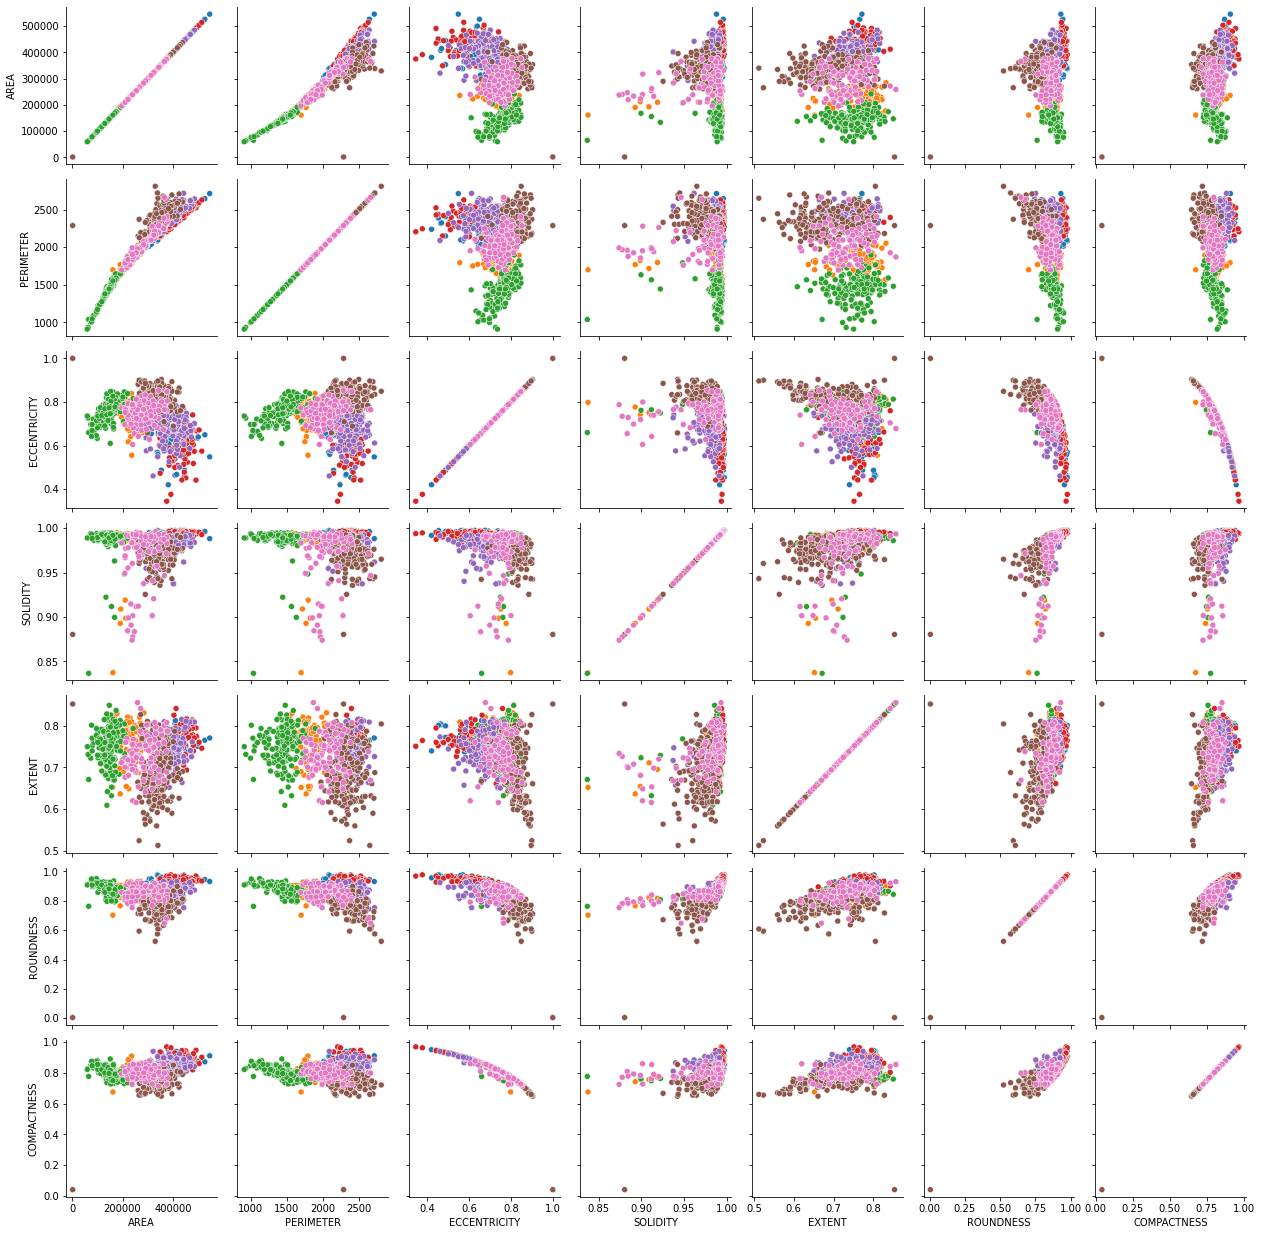

In [ ]:
# Let's look at separability among some of the classes!
import seaborn as sns
pg = sns.PairGrid(df[["AREA", "PERIMETER", "ECCENTRICITY", "SOLIDITY", "EXTENT", "ROUNDNESS", "COMPACTNESS", "Class"]], hue="Class")
pg.map(sns.scatterplot)

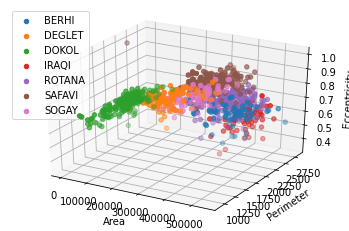

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
groups = df.groupby("Class")
for name, group in groups:
    ax.scatter3D(group["AREA"], group["PERIMETER"], group["ECCENTRICITY"], label=name)
    
ax.set_xlabel("Area")
ax.set_ylabel("Perimeter")
ax.set_zlabel("Eccentricity")
ax.legend()

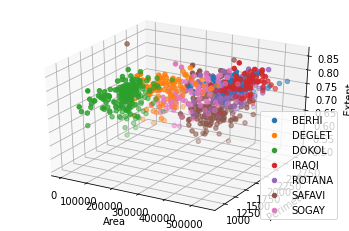

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
groups = df.groupby("Class")
for name, group in groups:
    ax.scatter3D(group["AREA"], group["PERIMETER"], group["EXTENT"], label=name)
    
ax.set_xlabel("Area")
ax.set_ylabel("Perimeter")
ax.set_zlabel("Extent")
ax.legend()

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)
clf = make_pipeline(StandardScaler(), SVC(C=3, gamma='auto'))
X = train.drop("Class", 1).to_numpy()
y = train["Class"].to_numpy()
clf.fit(X, y)
clf.score(test.drop("Class", 1).to_numpy(), test["Class"].to_numpy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


0.9333333333333333